In [1]:
import numpy as np
import pandas as pd
import os
import datetime
import re
import math
from sklearn.utils import shuffle
import seaborn as sb
import matplotlib.pyplot as plt
import json
from collections import defaultdict

import matplotlib.dates as mdates
import matplotlib.cbook as cbook
#scipy is used to get pearson correlation between features
from scipy import stats

In [2]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jeatarsey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

us_abbrev_state = {}
for key in us_state_abbrev:
    us_abbrev_state[us_state_abbrev[key]] = key
print(us_abbrev_state)


{'WA': 'Washington', 'DE': 'Delaware', 'WI': 'Wisconsin', 'WV': 'West Virginia', 'HI': 'Hawaii', 'FL': 'Florida', 'WY': 'Wyoming', 'NH': 'New Hampshire', 'NJ': 'New Jeatarsey', 'NM': 'New Mexico', 'TX': 'Texas', 'LA': 'Louisiana', 'NC': 'North Carolina', 'ND': 'North Dakota', 'NE': 'Nebraska', 'TN': 'Tennessee', 'NY': 'New York', 'PA': 'Pennsylvania', 'AK': 'Alaska', 'NV': 'Nevada', 'VA': 'Virginia', 'CO': 'Colorado', 'CA': 'California', 'AL': 'Alabama', 'AR': 'Arkansas', 'VT': 'Vermont', 'IL': 'Illinois', 'GA': 'Georgia', 'IN': 'Indiana', 'IA': 'Iowa', 'MA': 'Massachusetts', 'AZ': 'Arizona', 'ID': 'Idaho', 'CT': 'Connecticut', 'ME': 'Maine', 'MD': 'Maryland', 'OK': 'Oklahoma', 'OH': 'Ohio', 'UT': 'Utah', 'MO': 'Missouri', 'MN': 'Minnesota', 'MI': 'Michigan', 'RI': 'Rhode Island', 'KS': 'Kansas', 'MT': 'Montana', 'MS': 'Mississippi', 'SC': 'South Carolina', 'KY': 'Kentucky', 'OR': 'Oregon', 'SD': 'South Dakota'}


In [3]:
house_hold_income_df = pd.read_csv("Data/houseHoldIncome.csv")
statesHouseHoldIncome= defaultdict(list)
for index, row in house_hold_income_df.iterrows():
    for year in range(2012,2017):
        statesHouseHoldIncome[us_state_abbrev[row['State Name']]].append(row[str(year)])

In [4]:
years= []
for i in range(2012, 2017):
    years.append(i)

In [5]:
statesHouseHoldIncome, years

(defaultdict(list,
             {'AZ': [67444, 66971, 67557, 68297, 70432],
              'CA': [85265, 85408, 86704, 87877, 91149],
              'FL': [66599, 66368, 67143, 67975, 69936],
              'KS': [67564, 68051, 69271, 70093, 71975],
              'MN': [76372, 77204, 79106, 80444, 83100],
              'MT': [59569, 60639, 62086, 63139, 65401]}),
 [2012, 2013, 2014, 2015, 2016])

In [6]:
ev_registrations_df = pd.read_csv("Data/EV_Registration.csv")
evRegistrations= defaultdict(list)
for index, row in ev_registrations_df.iterrows():
    prev = row['2011']
    for year in range(2012,2017):
        evRegistrations[us_state_abbrev[row['State Name']]].append(row[str(year)] - prev)
        prev = row[str(year)]

In [7]:
evRegistrations, years

(defaultdict(list,
             {'AZ': [10371, 14468, 11548, 9061, 9585],
              'CA': [111792, 161561, 172161, 178464, 169743],
              'FL': [29745, 42561, 33474, 29472, 26177],
              'KS': [3011, 2545, 4555, 2274, 2431],
              'MN': [6451, 8754, 7665, 3966, 5624],
              'MT': [1086, 1274, 1316, 1076, 1273]}),
 [2012, 2013, 2014, 2015, 2016])

In [8]:
def buildPlot(yearsList, y1, y2, labelx, labely1,labely2, text,plotId1, plotId2):
    
#     houseHoldIncome= np.array(statesHouseHoldIncome['AZ'])
#     # import pdb; pdb.set_trace()
#     EV= np.array(evRegistrations['AZ'])
    y1 = np.array(y1)
    y2 = np.array(y2)


    fig = plt.figure(figsize=(13,3))
    fig.suptitle(text)
    ax1 = fig.add_subplot(plotId1)


    ax1.plot(yearsList, y1,color='orange')
    #plt.plot(years, EV,color='blue')

    plt.ylabel(labely1)
    
    #plt.xlabel('years')
    plt.legend([labely1], loc='upper left')
    # ax1.set_xlim(min(years), max(years))
    # ax1.set_ylim(min(houseHoldIncome),max(houseHoldIncome))
    plt.locator_params(axis='x', nbins=5)
    plt.xlabel(labelx)

    ax2 = fig.add_subplot(plotId2)
    ax2.plot(yearsList,y2, color='blue')
    #plt.plot(years, EV,color='blue')

    plt.ylabel(labely2)
    plt.xlabel(labelx)
    plt.legend([labely2], loc='upper left')
    plt.locator_params(axis='x', nbins=5)
    
    

    # fig.set_size_inches(15,50)
    plt.show()
    #return plt
# buildPlot(years,statesHouseHoldIncome['AZ'] , evRegistrations['AZ'],'years', 'HouseHold Income', 'EV adoption', 'HouseHold Income and EV adoption ('+us_abbrev_state['AZ']+')',211,212 )

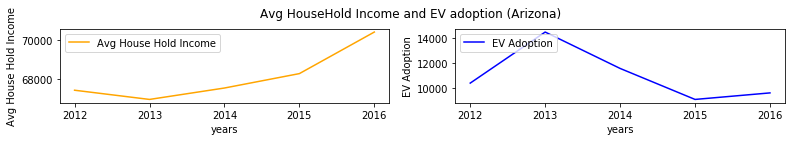

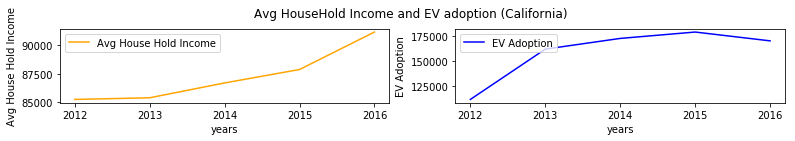

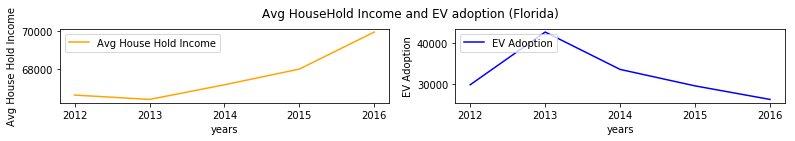

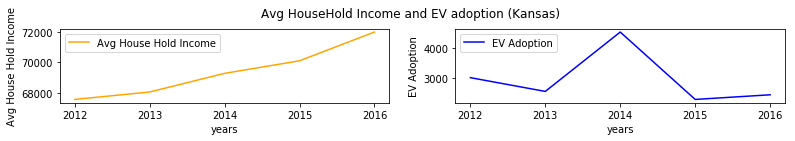

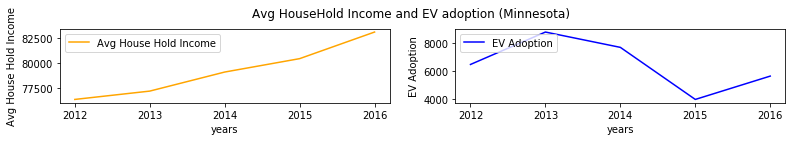

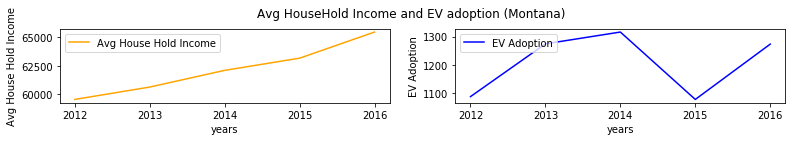

In [230]:
states = ['AZ','CA','FL','KS','MN','MT',];

for state in states:
    buildPlot(years,statesHouseHoldIncome[state],evRegistrations[state],'years','Avg House Hold Income', 'EV Adoption','Avg HouseHold Income and EV adoption ('+us_abbrev_state[state]+')',221,222)

In [9]:
educational_attainment_df = pd.read_csv("Data/educationAttainment.csv")
statesEducationalAttainment= defaultdict(list)
for index, row in educational_attainment_df.iterrows():
    for year in range(2012,2017):
        statesEducationalAttainment[us_state_abbrev[row['State Name']]].append(row[str(year)])

In [10]:
statesEducationalAttainment

defaultdict(list,
            {'AZ': [1103888, 1132811, 1161170, 1199010, 1241425],
             'CA': [7656950, 7795640, 8158064, 8415690, 8660470],
             'FL': [3439430, 3530070, 3620940, 3780148, 3929796],
             'KS': [551423, 558703, 571601, 580214, 593801],
             'MN': [1138849, 1161319, 1194943, 1225245, 1253937],
             'MT': [191331, 193892, 198348, 203448, 209072]})

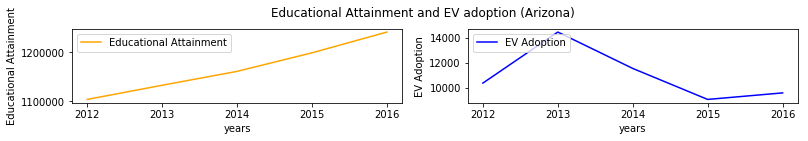

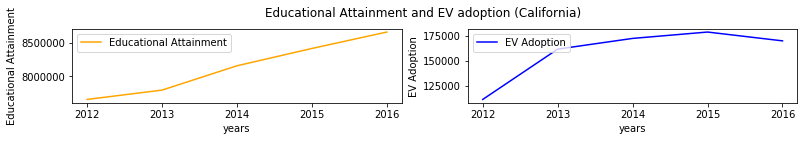

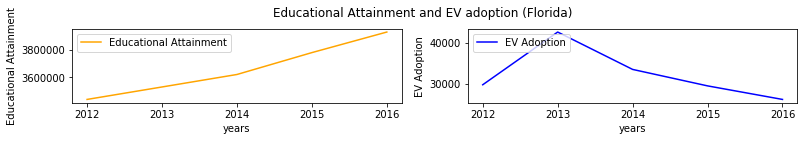

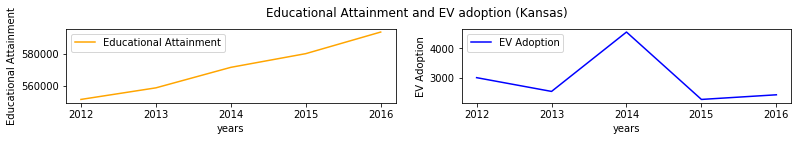

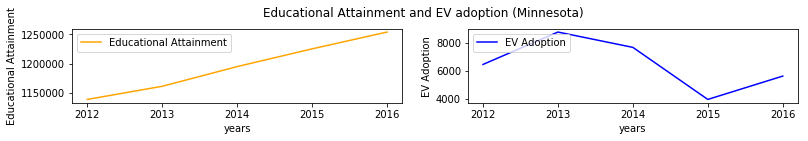

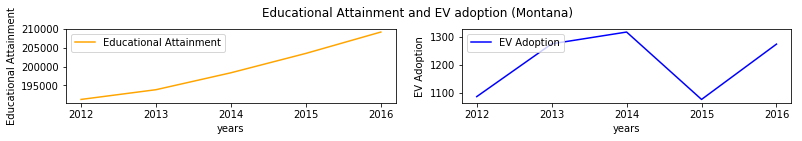

In [11]:
states = ['AZ','CA','FL','KS','MN','MT',];

for state in states:
    buildPlot(years,statesEducationalAttainment[state],evRegistrations[state],'years','Educational Attainment', 'EV Adoption','Educational Attainment and EV adoption ('+us_abbrev_state[state]+')',221,222)

In [12]:
gasoline_prices_df = pd.read_csv("Data/gasolinePrices.csv")
print(gasoline_prices_df)
gasolinePrices = defaultdict(list)
for index, row in gasoline_prices_df.iterrows():
    for year in range(2012,2017):
        gasolinePrices[us_state_abbrev[row['State Name']]].append(row[str(year)])

   State Name   2012   2013   2014   2015   2016
0  California  4.081  3.933  3.794  3.221  2.782
1     Florida  3.629  3.572  3.421  2.438  2.216
2   Minnesota  3.562  3.496  3.296  2.398  2.090


In [13]:
gasolinePrices

defaultdict(list,
            {'CA': [4.081,
              3.9330000000000003,
              3.7939999999999996,
              3.221,
              2.782],
             'FL': [3.6289999999999996,
              3.572,
              3.4210000000000003,
              2.438,
              2.2159999999999997],
             'MN': [3.562,
              3.4960000000000004,
              3.2960000000000003,
              2.398,
              2.09]})

In [14]:
statesForGasoline = ['CA','MN','FL']

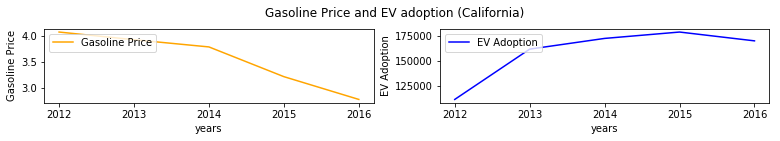

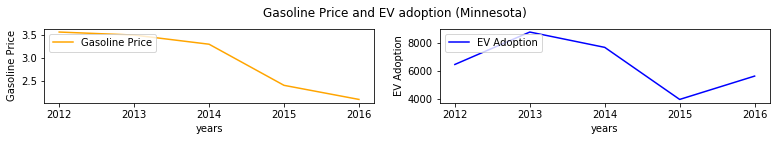

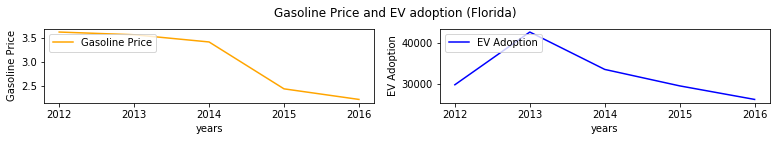

In [15]:
for state in statesForGasoline:
    buildPlot(years,gasolinePrices[state],evRegistrations[state],'years','Gasoline Price', 'EV Adoption','Gasoline Price and EV adoption ('+us_abbrev_state[state]+')',221,222)

In [16]:
contributions = { 1010: 'Gasoline Price', 100: 'Avg Household Income', 2834: 'Charging Station count', 623: 'Tax Credit', 2290: 'Educational Attainment', 1045: 'Charging Rate Incentive', 2135: 'Purchase Rebate', 2456: 'HOV Lane Exemption', 26: 'Parking Exemption', 143: 'Supply Incentive', 1887: 'Median Age'}

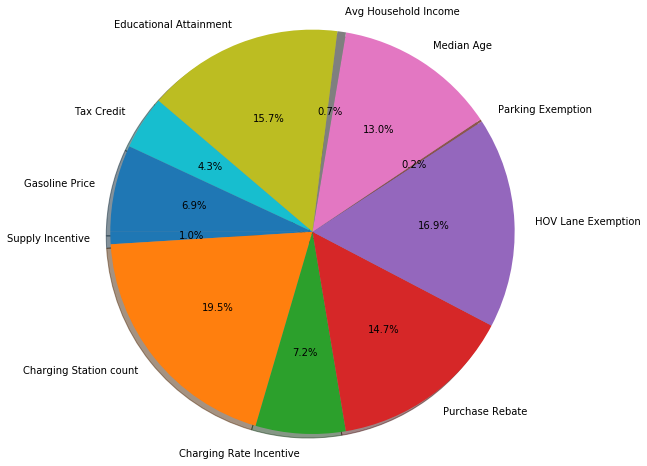

In [19]:
labels = [];
sizes = []
for c in contributions:
    labels.append(contributions[c])
    sizes.append(c)

explode = (0,0,0,0,0,0,0,0,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
fig1.set_size_inches(8,8)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()